In [19]:
import sympy as sp

A = sp.Matrix([[2+2*sp.I,2],[2,2+2*sp.I]])
A

Matrix([
[2 + 2*I,       2],
[      2, 2 + 2*I]])

In [20]:
A_exp = sp.exp(A)
A_exp

Matrix([
[ exp(2*I)/2 + exp(4 + 2*I)/2, -exp(2*I)/2 + exp(4 + 2*I)/2],
[-exp(2*I)/2 + exp(4 + 2*I)/2,  exp(2*I)/2 + exp(4 + 2*I)/2]])

In [21]:
A_exp.evalf(3)

Matrix([
[-11.6 + 25.3*I, -11.2 + 24.4*I],
[-11.2 + 24.4*I, -11.6 + 25.3*I]])

In [90]:
from sympy import Rational, factorial, zeros
from sympy.matrices import Matrix
import sympy as sp

def padee_approx(M, m):
    """
    Compute the mth degree Pade approximation for e^M.
    
    Parameters:
    M : matrix or scalar
        The input matrix or scalar for which to compute the exponential.
    m : int
        The degree of the Pade approximation.
        
    Returns:
    Matrix or scalar
        The Pade approximation of e^M.
    """
    # Numerator Coefficients
    def B_coef(k):
        return Rational(
            factorial(2*m - k) * factorial(m),
            factorial(2*m) * factorial(k) * factorial(m - k)
        )
    
    # Denominator Coefficients    
    def A_coef(k): 
        return (-1)**k * B_coef(k)  
    
    # Check if M is a matrix by verifying if it has the 'shape' attribute
    if hasattr(M, 'shape'):
        # M is assumed to be a matrix
        rows, cols = M.shape
        N = zeros(rows, cols)
        D = zeros(rows, cols)
    
        for k in range(0, m + 1):
            N += B_coef(k) * M**k
            D += A_coef(k) * M**k
        
        # Return the matrix product of N and the inverse of D
        return N * D.inv()
    else:
        # M is assumed to be a scalar
        N = 0
        D = 0
        for k in range(0, m + 1):
            N += B_coef(k) * M**k
            D += A_coef(k) * M**k
        
        # Return the scalar division of N by D
        return N / D
display(sp.simplify((padee_approx(sp.symbols('B'),9)))) # Only do odd numbers, even numbers introduce poles or something that make them less accurate.
#print(sp.latex(padee_approx(sp.symbols('B'),13)))

(-B**9 - 90*B**8 - 3960*B**7 - 110880*B**6 - 2162160*B**5 - 30270240*B**4 - 302702400*B**3 - 2075673600*B**2 - 8821612800*B - 17643225600)/(B**9 - 90*B**8 + 3960*B**7 - 110880*B**6 + 2162160*B**5 - 30270240*B**4 + 302702400*B**3 - 2075673600*B**2 + 8821612800*B - 17643225600)

In [32]:
B_matrix = A * sp.Pow(2,-9)
B_matrix


Matrix([
[1/256 + I/256,         1/256],
[        1/256, 1/256 + I/256]])

In [61]:
from sympy import MatrixSymbol, Identity, symbols

# Define symbolic matrix B and identity matrix I (size n x n)
n = symbols('n')  # Size of the matrix (e.g., 3 for 3x3 matrices)
B = MatrixSymbol('B', n, n)
I = Identity(2)   # Identity matrix of the same size as B

# First polynomial: -B^3 - 12B^2 - 60B - 120I
poly1 = -(((B + 12*I) @ B + 60*I) @ B + 120*I)

# Second polynomial: B^3 - 12B^2 + 60B - 120I
poly2 = ((B - 12*I) @ B + 60*I) @ B - 120*I

from sympy import Matrix

# Define a concrete matrix (e.g., 2x2)
B_concrete = Matrix([[2+2*sp.I, 2], [2, 2+2*sp.I]])
n_value = 2  # Size of the matrix

# Substitute into poly1 and poly2
poly1_substituted = poly1.subs({B: B_concrete, n: n_value}).doit()
poly2_substituted = poly2.subs({B: B_concrete, n: n_value}).doit()

import numpy as np

# Convert SymPy matrices to NumPy arrays
poly1_np = np.array(poly1_substituted.tolist()).astype(np.complex128)
poly2_np = np.array(poly2_substituted.tolist()).astype(np.complex128)

# Compute the inverse and ratio
try:
    poly2_inv_np = np.linalg.inv(poly2_np)
    ratio_np = poly1_np @ poly2_inv_np
    print("Numerical ratio (rounded):\n", np.round(ratio_np, 3))
except np.linalg.LinAlgError:
    print("Matrix is singular (non-invertible).")

AttributeError: 'MatAdd' object has no attribute 'tolist'

In [71]:
import numpy as np
from numpy.linalg import inv, matrix_power, LinAlgError

def calculate_matrix_expression(B):
    """
    Calculate the expression:
    (B^3 / 120 + B^2 / 10 + B / 2 + I) @ inv(-B^3 / 120 + B^2 / 10 - B / 2 + I)
    
    Parameters:
    B (numpy.ndarray): A square NumPy array (matrix) with possible complex entries.
    
    Returns:
    numpy.ndarray: The resulting matrix after evaluating the expression.
    
    Raises:
    ValueError: If B is not a square matrix.
    LinAlgError: If the denominator matrix is singular (non-invertible).
    """
    # Ensure B is a NumPy array with complex data type
    B = np.array(B, dtype=np.complex128)
    
    # Check if B is a square matrix
    if B.shape[0] != B.shape[1]:
        raise ValueError("Input matrix B must be square (n x n).")
    
    # Define the identity matrix of the same size as B
    I = np.eye(B.shape[0], dtype=np.complex128)
    
    # Compute B^3 and B^2 using matrix_power
    B3 = matrix_power(B, 3)
    B2 = matrix_power(B, 2)
    
    # Compute the numerator: (B^3 / 120) + (B^2 / 10) + (B / 2) + I
    numerator = (B3 / 120) + (B2 / 10) + (B / 2) + I
    
    # Compute the denominator: (-B^3 / 120) + (B^2 / 10) - (B / 2) + I
    denominator = (-B3 / 120) + (B2 / 10) - (B / 2) + I
    
    try:
        # Compute the inverse of the denominator
        denominator_inv = inv(denominator)
    except LinAlgError as e:
        raise LinAlgError("Denominator matrix is singular and cannot be inverted.") from e
    
    # Compute the final output using matrix multiplication
    output = numerator @ denominator_inv
    
    return output

unscaled_matrix = calculate_matrix_expression(np.array(B_matrix.tolist(), dtype=np.complex128))
display(unscaled_matrix)



array([[1.00391389+3.92155858e-03j, 0.00392152+1.53185103e-05j],
       [0.00392152+1.53185103e-05j, 1.00391389+3.92155858e-03j]])

In [72]:
unscaled_matrix ** (2 ** 9)

array([[-3.08696723+6.74514646j, -0.        +0.j        ],
       [-0.        +0.j        , -3.08696723+6.74514646j]])

In [ ]:
def to_sfixed(value, left, right):
    """
    Converts a number into its VHDL sfixed two's-complement binary representation.
    
    Parameters:
      value : float or int
          The number to convert.
      left : int
          The left (most significant) index of the sfixed type.
      right : int
          The right (least significant) index of the sfixed type.
    
    Returns:
      A string of bits (with leading zeros if necessary) representing the fixed‐point number.
      
    For a type declared as sfixed(left downto right) the total number of bits is:
          width = left - right + 1
    For example, to_sfixed(3.14159, 50, -64) returns a binary string 115 bits long.
    
    (If you really need a 116‐bit result for 50, -64, then change the width calculation to:
          width = left - right + 2
    )
    """
    # Compute the width of the sfixed representation.
    width = left - right + 1
    
    # The fixed-point resolution is 2^(right). (Since right is usually negative, 2^(-right) is the scaling factor.)
    scale = 2 ** (-right)
    
    # Multiply by the scaling factor and round to get the fixed‐point integer.
    fixed_val = int(round(value * scale))
    
    # For negative numbers, convert to two's complement.
    if fixed_val < 0:
        fixed_val = (1 << width) + fixed_val

    # Mask the result so that it fits in 'width' bits and then format as a zero-padded binary string.
    fixed_val &= (1 << width) - 1
    return format(fixed_val, '0{}b'.format(width))


# Example usage:
if __name__ == '__main__':
    # For example, convert 3.14159 to sfixed with range (50 downto -64)
    rep = to_sfixed(3.14159, 50, -64)
    print("sfixed(50 downto -64) representation of 3.14159:")
    print(rep)
    print("Length =", len(rep))


sfixed(50 downto -64) representation of 3.14159:
0000000000000000000000000000000000000000000000000110010010000111111001111100000001101110000110011011100000000000000
Length = 115


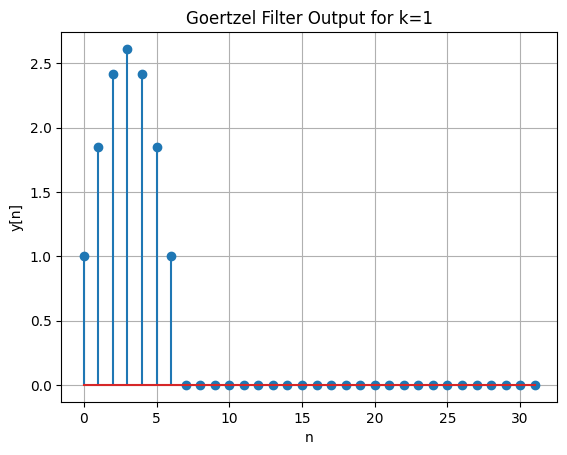

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 16         # total "DFT size"
k = 1          # Goertzel bin index

# Create input: delta at n=0 and n=N/2
L = 2*N        # we will look at 2*N samples just to be safe
x = np.zeros(L)
x[0] = 1
x[N//2] = 1    # second impulse at n = N/2

# Prepare output array
y = np.zeros(L)

# Goertzel filter coefficient for bin k=1
#  y[n] = x[n] + 2*cos(2*pi*k/N) * y[n-1] - y[n-2].
c = 2.0 * np.cos(2.0 * np.pi * k / N)

# Apply filter difference equation
for n in range(L):
    if n == 0:
        # y[-1] and y[-2] are 0
        y[n] = x[n]
    elif n == 1:
        # y[-2] is 0
        y[n] = x[n] + c*y[n-1]
    else:
        y[n] = x[n] + c*y[n-1] - y[n-2]

# Plot the result
plt.stem(range(L), y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Goertzel Filter Output for k=1')
plt.grid(True)
plt.show()


In [6]:
import numpy as np

A = np.matrix(
[[4,4,4,4],
 [4,4,4,4],
 [4,4,4,4],
 [4,4,4,4]]    
)
A_guess = A.T/(np.linalg.norm(A,1) * np.linalg.norm(A,np.inf))
A_guess

matrix([[0.015625, 0.015625, 0.015625, 0.015625],
        [0.015625, 0.015625, 0.015625, 0.015625],
        [0.015625, 0.015625, 0.015625, 0.015625],
        [0.015625, 0.015625, 0.015625, 0.015625]])